/var/folders/kd/_30kg3851g7658tq6jwrfn040000gn/T/ipykernel_65003/408206634.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrowPatch((trajectory[i, 0], trajectory[i, 1]),


(-1.0, 1.0)

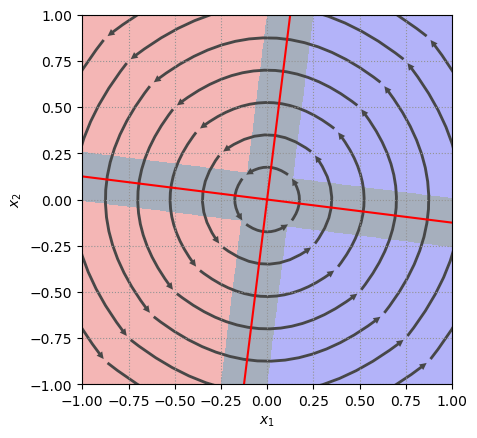

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Arc, RegularPolygon
from numpy import radians as rad
from matplotlib.colors import ListedColormap


def predictor(x):
    result = []
    for i in x:
        if -8 * i[0] + i[1] < 0.125 * np.sqrt(65) and -8 * i[0] + i[1] > - 0.125 * np.sqrt(65):
            result.append(2)
        elif i[0] <= 0:
            if (1/8) * i[0] + i[1] < 0.125 * np.sqrt(1+ 1/8) and (1/8) * i[0] + i[1] > - 0.125 * np.sqrt(1+ 1/8):
                result.append(2)
            else:
                result.append(1)
        else:
            if (1/8) * i[0] + i[1] < 0.125 * np.sqrt(1+ 1/8) and (1/8) * i[0] + i[1] > - 0.125 * np.sqrt(1+ 1/8):
                result.append(2)
            else:
                result.append(0)
    return np.array(result)

def f(Y, t):
    A = np.array([[0, -1],[1, 0]])
    return np.matmul(A , Y)


h = 0.002  # step size in the mesh
x_min, x_max = -1, 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Plot the trajectory with curved arrows indicating the step-by-step trajectory
fig, ax = plt.subplots()

def add_traj(x0):
    # Define the number of time steps
    num_steps = 4

    # Initialize an array to store the trajectory
    trajectory = np.zeros((num_steps + 1, 2))
    trajectory[0] = x0

    # Compute the trajectory step by step
    for i in range(num_steps):
        x = f(trajectory[i],0)
        trajectory[i + 1] = x

    for i in range(num_steps):
        dx = trajectory[i + 1, 0] - trajectory[i, 0]
        dy = trajectory[i + 1, 1] - trajectory[i, 1]
        
        arrow = FancyArrowPatch((trajectory[i, 0], trajectory[i, 1]), 
                                (trajectory[i + 1, 0], trajectory[i + 1, 1]), 
                                mutation_scale=10, 
                            linewidth=.01, edgecolor='#474747', color = '#474747',connectionstyle="arc3,rad=.4")
        ax.add_patch(arrow)



Z = predictor(np.around(np.c_[xx.ravel(), yy.ravel()], decimals = 3))
Z = Z.reshape(xx.shape)


# Create a colormap for the decision regions
cmap = ListedColormap(['#b3b3f9', '#f4b6b5',"#a6afbd"])

# Plot the decision regions
plt.pcolormesh(xx,yy,Z, cmap=cmap)


x0 =  np.array([.5, .5])
add_traj(x0)
x0 =  np.array([.25, .25])
add_traj(x0)
x0 =  np.array([.75, .75])
add_traj(x0)
x0 =  np.array([.125, .125])
add_traj(x0)
x0 =  np.array([.375, .375])
add_traj(x0)
x0 =  np.array([.625, .625])
add_traj(x0)
x0 =  np.array([.875, .875])
add_traj(x0)


def drawCirc(ax,radius,centX,centY,angle_,theta2_,color_='#474747'):
    #========Line
    arc = Arc([centX,centY],radius,radius,angle=angle_,
          theta1=50,theta2=theta2_,capstyle='round',linestyle='-',lw=2,color=color_)
    ax.add_patch(arc)


    #========Create the arrow head
    endX=centX+(radius/2)*np.cos(rad(theta2_+angle_)) #Do trig to determine end position
    endY=centY+(radius/2)*np.sin(rad(theta2_+angle_))

    ax.add_patch(                    #Create triangle as arrow head
        RegularPolygon(
            (endX, endY),            # (x,y)
            3,                       # number of vertices
            radius/9,                # radius
            rad(angle_+theta2_),     # orientation
            color=color_
        )
    )
    ax.set_xlim([centX-radius,centY+radius]) and ax.set_ylim([centY-radius,centY+radius]) 
    # Make sure you keep the axes scaled or else arrow will distort

ax.plot()

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.grid(visible = True, linestyle = ':', color = '#949494')

x = np.linspace(-1, 1., 600)
x2 = np.linspace(0, 1., 600)
x3 = np.linspace(-1,0,600)

plt.plot(x,(1/0.125) *x, color = 'red')
plt.plot(x2,-0.125*x2, color = 'red')
plt.plot(x3,-0.125*x3, color = 'red')
left,right = plt.xlim()

plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.savefig('./figures/phase.png', dpi=800, bbox_inches='tight')
